In [2]:
#setup
import numpy as np
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

import matplotlib.colors as colors

from sklearn.cluster import Birch

In [3]:
def plotClustering(X, plt_labels, title=None, show_all_dbs=False):
    if title:
        plt.title(title)
    
    plt_colors = cycle(colors.TABLEAU_COLORS)
    
    plt_l = np.unique(plt_labels)
    plt_K = np.unique(plt_labels).size
    
    if -1 in plt_l:
        plt_K -= 1
        
    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.scatter(x=X[mask, 0], y=X[mask, 1], c=color, edgecolor='w', s=40)
    
    if show_all_dbs:
        color = next(plt_colors)
        mask = (plt_labels == -1)
        plt.scatter(x=X[mask, 0], y=X[mask, 1], c=color, edgecolor='w', s=40)

    plt.show()

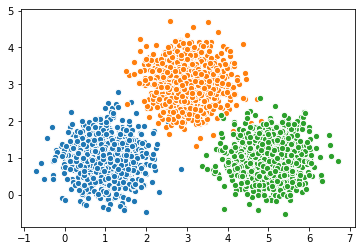

In [4]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
plotClustering(X, labels)

## Zadanie 1.
Zapoznaj się dokładniej z implementacją algorytmu BIRCH w SciKit (http://scikit-learn.org/stable/modules/clustering.html#birch).

a) Wykonaj grupowanie z niskią wartością parametru threshold (na przykład 0.25). Algorytm utworzy wówczas dużo grup danych (zazwyczaj więcej niż potrzeba).

b) Zrób nowy rysunek wyników algorytmu BIRCH. Zaznacz na nim pozycje centrów grup przypisanych do korzenia utworzonego drzewa grupowania (korzeń drzewa zapisany jest w birch.root_, zaś centra w birch.root_.centroids_) oraz punkty danych w kolorach odpowiadającym utworzonym grupom. Jeśli utworzone drzewo grupowania ma więcej poziomów, to zrób jeszcze rysunek dla grupowania na poziomie niżej niż korzeń.

c) Jakie znaczenie ma parametr n_clusters? Czym różni się n_clusters = None od n_clusters = 3?

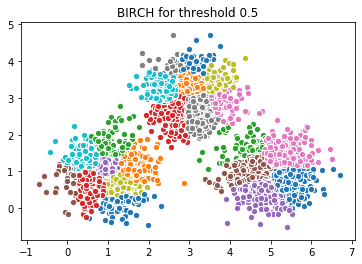

In [5]:
t = 0.5
birch = Birch(threshold=t, n_clusters=None)
birch.fit(X)
plotClustering(X, birch.labels_, title=f'BIRCH for threshold {t}')

In [12]:
t = 1
birch = Birch(threshold=t, n_clusters=None)
birch.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1)

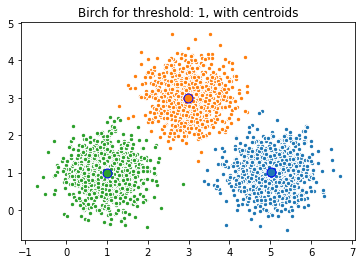

In [36]:
plt.title(f'Birch for threshold: {t}, with centroids')
plt_colors = cycle(colors.TABLEAU_COLORS)

for i in range(np.unique(birch.labels_).size):
    mask = birch.labels_ == i
    color = next(plt_colors)
    plt.scatter(x=X[mask, 0], y=X[mask, 1], c=color, s=20, edgecolor='w')
    c = birch.root_.centroids_[i]
    plt.scatter(x=c[0], y=c[1], c=color, s=80, edgecolor='b')